# EDA - WEEK 9 IP - TITANIC DATASET

## 1) Defining the Question

### a) Specifying the Question

>Build a model to predict whether a passenger Survived or not

### b) Defining the Metric for Success

### c) Understanding the context

### d) Recording the Experimental Design

### e) Data Relevance

## 2) Reading the Data

In [1]:
# load our libraries

# Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
# Modelling 
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

print("Setup Complete")

Setup Complete


In [2]:
# load our dataset
df = pd.read_csv('train.csv')

## 3) Checking the data

In [3]:
# determining the no of records
df.shape

(891, 12)

> Our dataset has 12 columns and 891 rows

In [4]:
# previewing the top of our dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# previewing the bottom of our dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# check the datatypes of our dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# check the name of our columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# check the unique values
print(f'Unique values in Cabin:',df.Cabin.unique())
print('*'*100)
print()
print(f'Unique values in Embarked:',df.Embarked.unique())

Unique values in Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
*******************

In [9]:
# check percentage of nan values in the dataset
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Drop Cabin column since it exceeds the rule of thumb of missing values.

Impute the embarked and age columns

In [10]:
# drop unwanted columns - PassengerId, Name, Ticket and Cabin
df.drop(['PassengerId','Name','Ticket','Cabin','Parch'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [11]:
# imputing the missing values

# impute age with mean
df.fillna(df['Age'].mean(), inplace=True)

# impute embarked with mode
df.fillna(df['Embarked'].mode(), inplace=True)

In [12]:
# confirm the missing values are imputed
df.isnull().values.any()

False

Our boolean returned False meaning there are no null values

In [13]:
# check the shape of our dataset
df.shape

(891, 7)

## 4) External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

a) Validation

## 5) Tidying the Dataset

Text(0.5, 1.0, 'Boxplot of Pclass')

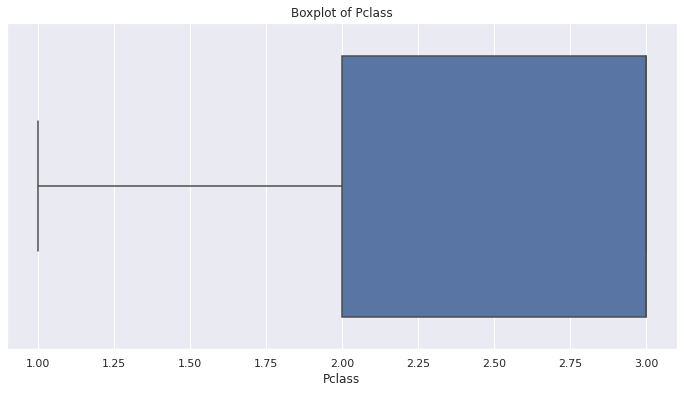

In [14]:
# checking for outliers in Pclass
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.boxplot(df['Pclass']).set_title('Boxplot of Pclass')

There is no presence of outliers in Pclass column

Text(0.5, 1.0, 'Boxplot of Age')

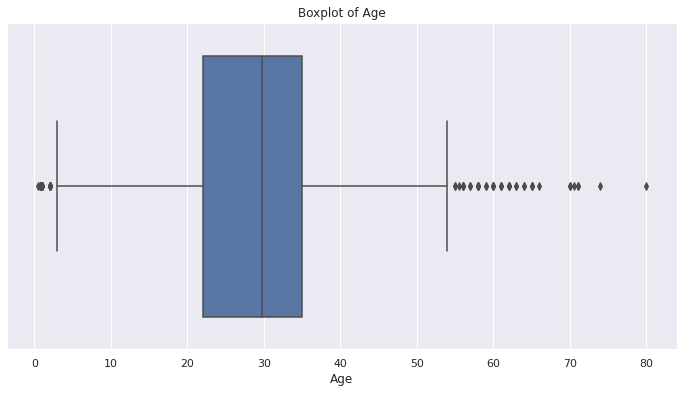

In [15]:
# checking for outliers in Age column
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.boxplot(df['Age']).set_title('Boxplot of Age')

There is presence of outliers in our age column

Text(0.5, 1.0, 'Boxplot of SibSp')

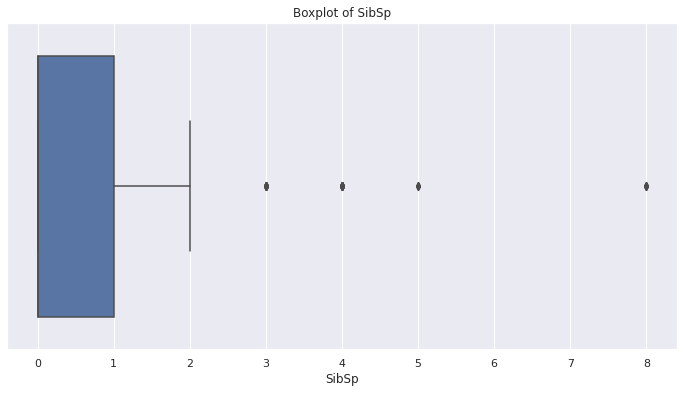

In [16]:
# checking for outliers in SibSp
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.boxplot(df['SibSp']).set_title("Boxplot of SibSp")

There is presence of outliers in SibSp

Text(0.5, 1.0, 'Boxplot of Fare')

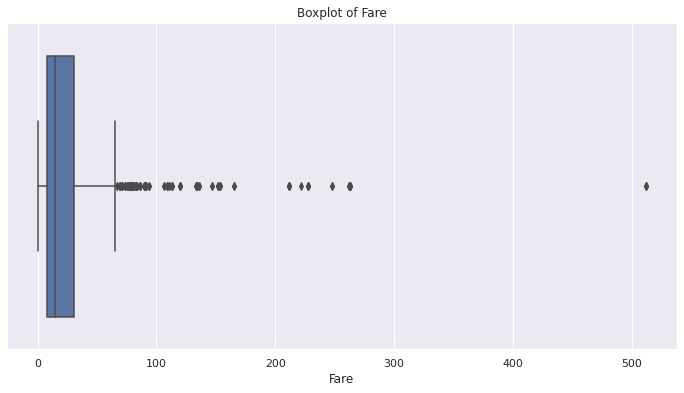

In [17]:
# checking for outliers in Fare
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.boxplot(df['Fare']).set_title('Boxplot of Fare')

There is presemce of outliers in Fare

In [18]:
# Dealing with outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Survived     1.0000
Pclass       1.0000
Age         13.0000
SibSp        1.0000
Fare        23.0896
dtype: float64


In [19]:
dataset = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset.shape)

(692, 7)


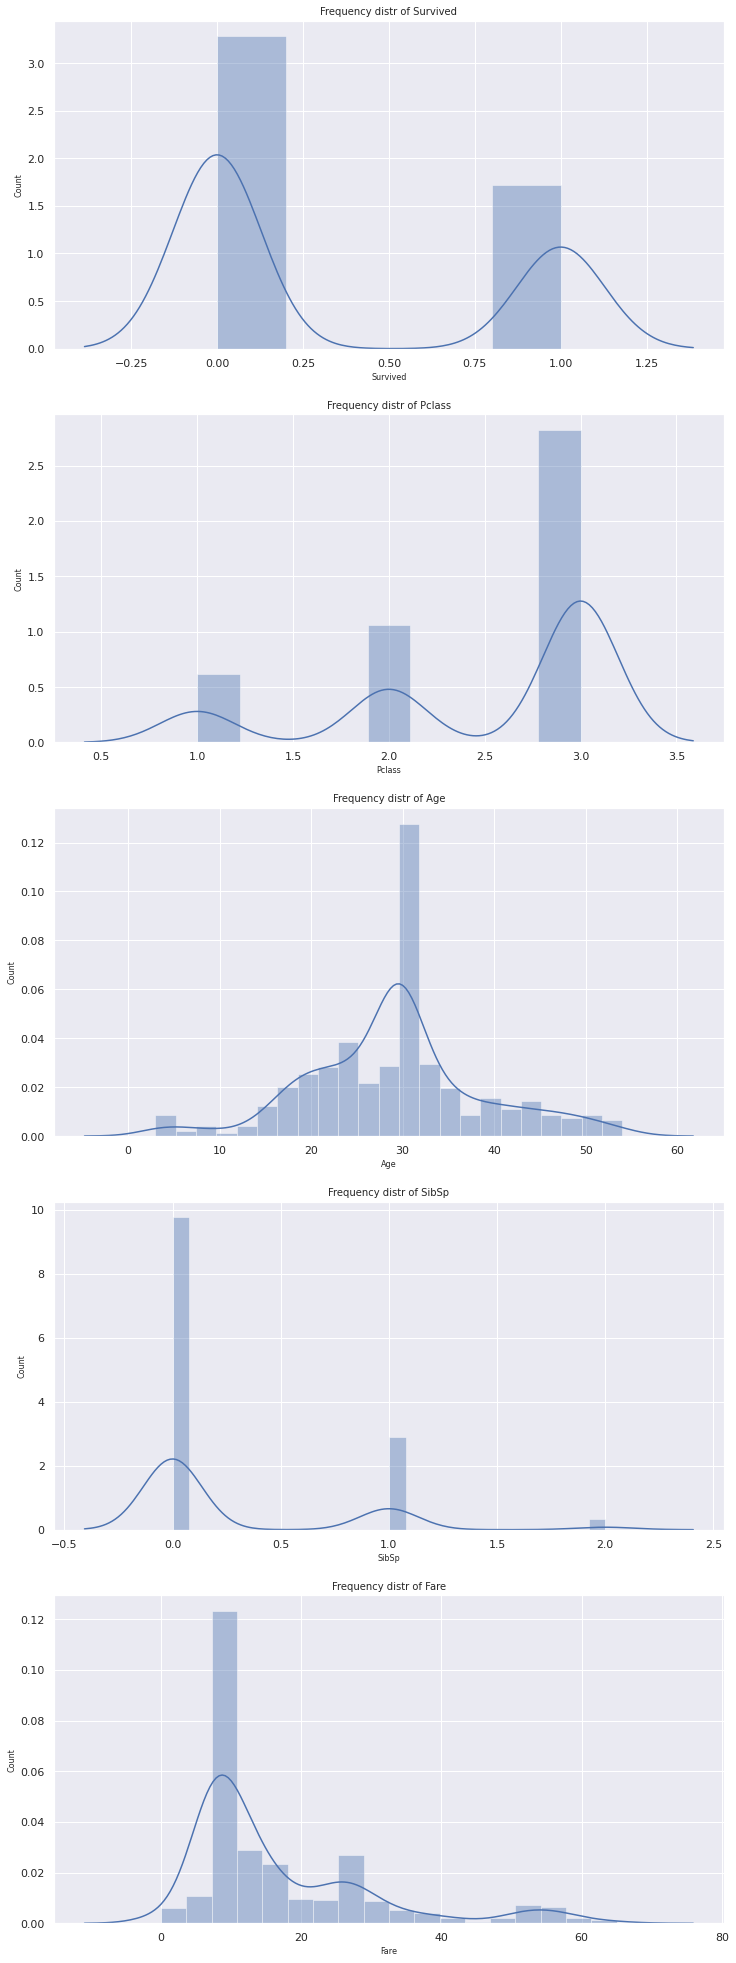

In [20]:
# checking for anomalies

column_names = ['Survived','Pclass','Age','SibSp','Fare']

fig, ax = plt.subplots(len(column_names), figsize=(12,35))

for i, col_val in enumerate(column_names):

    sns.distplot(dataset[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distr of '     +col_val    , fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

## 6) Exploratory Analysis

### Univariate Analysis

*Measure of Central Tendency*

In [21]:
# MEAN,MODE,MEDIAN
print(f'Mean of passengers age is:{dataset.Age.mean()}')
print('*'*100)
print()
print(f'Mode of passengers age is:{dataset.Age.mode()}')
print('*'*100)
print()
print(f'Median of passengers age is:{dataset.Age.median()}')
print('*'*100)
print()

Mean of passengers age is:29.11193726623592
****************************************************************************************************

Mode of passengers age is:0    29.699118
dtype: float64
****************************************************************************************************

Median of passengers age is:29.69911764705882
****************************************************************************************************



In [22]:
# MEAN,MODE,MEDIAN
print(f'Mean of passengers Fare is:{dataset.Fare.mean()}')
print('*'*100)
print()
print(f'Mode of passengers Fare is:{dataset.Fare.mode()}')
print('*'*100)
print()
print(f'Median of passengers Fare is:{dataset.Fare.median()}')
print('*'*100)
print()

Mean of passengers Fare is:16.838564739884397
****************************************************************************************************

Mode of passengers Fare is:0     8.05
1    13.00
dtype: float64
****************************************************************************************************

Median of passengers Fare is:10.5
****************************************************************************************************



*Measure of Dispersion*

In [23]:
# VARIANCE,STANDARD DEVIATION,SKEWNESS, KURTOSIS
print(f'Variance of passengers age is:{dataset.Age.var()}')
print('*'*100)
print()
print(f'Standard Deviation of passengers age  is:{dataset.Age.std()}')
print('*'*100)
print()
print(f'Skewness of passengers age  is:{dataset.Age.skew()}')
print('*'*100)
print()
print(f'Kurtosis of passengers age  is:{dataset.Age.kurt()}')
print('*'*100)
print()

Variance of passengers age is:91.2801074096259
****************************************************************************************************

Standard Deviation of passengers age  is:9.554062351148117
****************************************************************************************************

Skewness of passengers age  is:0.14432929503023412
****************************************************************************************************

Kurtosis of passengers age  is:0.550198169692472
****************************************************************************************************



In [24]:
# VARIANCE,STANDARD DEVIATION,SKEWNESS, KURTOSIS
print(f'Variance of passengers Fare is:{dataset.Fare.var()}')
print('*'*100)
print()
print(f'Standard Deviation of passengers Fare  is:{dataset.Fare.std()}')
print('*'*100)
print()
print(f'Skewness of passengers Fare is:{dataset.Fare.skew()}')
print('*'*100)
print()
print(f'Kurtosis of passengers Fare is:{dataset.Fare.kurt()}')
print('*'*100)
print()

Variance of passengers Fare is:180.55920361111316
****************************************************************************************************

Standard Deviation of passengers Fare  is:13.43723199215944
****************************************************************************************************

Skewness of passengers Fare is:1.6528078522395075
****************************************************************************************************

Kurtosis of passengers Fare is:2.190302720802256
****************************************************************************************************



**Barchart**

Text(0.5, 1.0, 'Countplot of Gender')

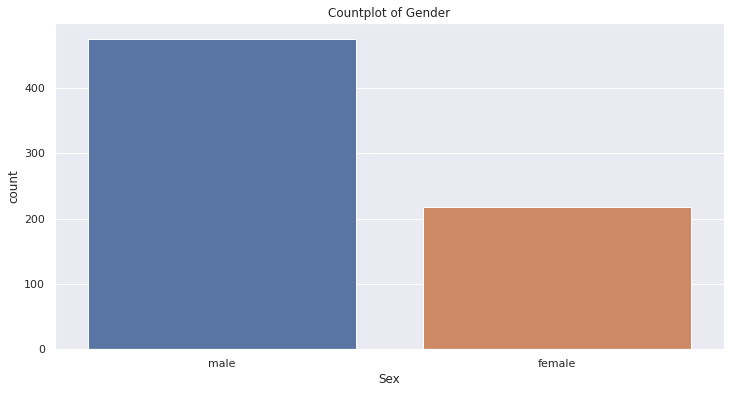

In [32]:
# barchart of the gender
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.countplot(dataset['Sex']).set_title("Countplot of Gender")

*From our barchart there were more male passengers compared to females*

Text(0.5, 1.0, 'Countplot of Survived')

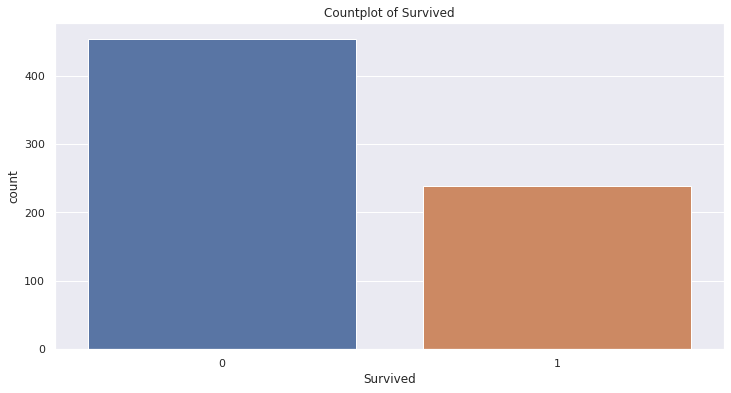

In [541]:
# barchart of count of Survived
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.countplot(dataset['Survived']).set_title("Countplot of Survived")

*From our countplot majority of the passengers did not survive*

Text(0.5, 1.0, 'Countplot of Embarked')

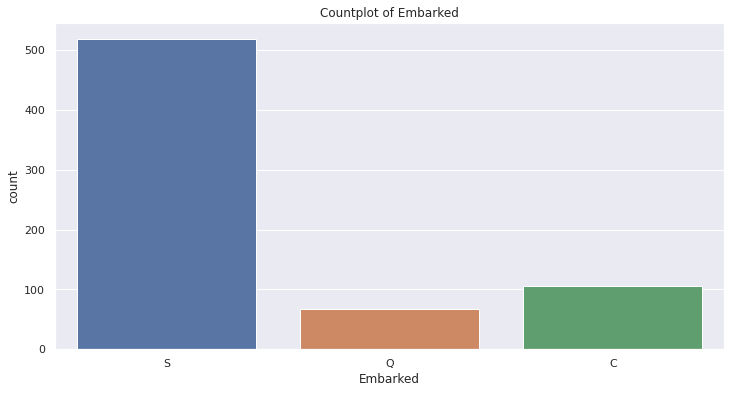

In [540]:
# barchart of count of Embarked
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.countplot(dataset['Embarked']).set_title("Countplot of Embarked")

From our Countplot it is visible that most passengers embarked from point S and the least from point Q

Text(0.5, 1.0, 'Countplot of Pclass')

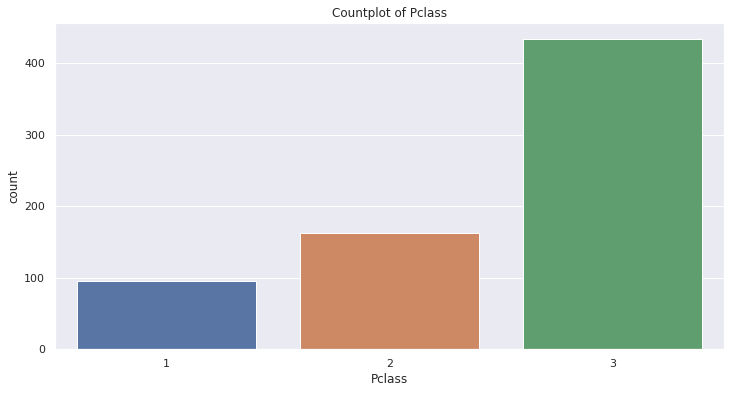

In [539]:
# barchart of count of Pclass
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.countplot(dataset['Pclass']).set_title("Countplot of Pclass")

*From our barchart it is visible that majority of the passengers occupied the 3rd class*

Text(0.5, 1.0, 'Countplot of SibSp')

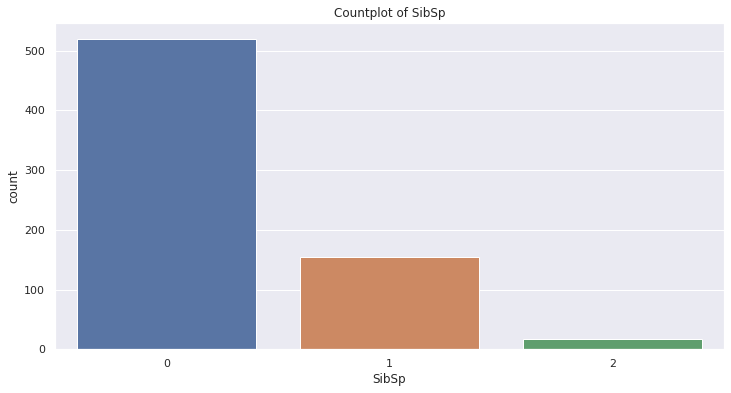

In [538]:
# barchart of count of SibSp
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.countplot(dataset['SibSp']).set_title("Countplot of SibSp")

**Piechart**

([<matplotlib.patches.Wedge at 0x7f97c9307150>,
 [Text(-0.9704075378418047, -0.5179857242239468, '0'),
  Text(0.9704075863391242, 0.5179856333678333, '1')],
 [Text(-0.5293132024591661, -0.28253766775851646, '65.607'),
  Text(0.5293132289122495, 0.28253761820063633, '34.393')])

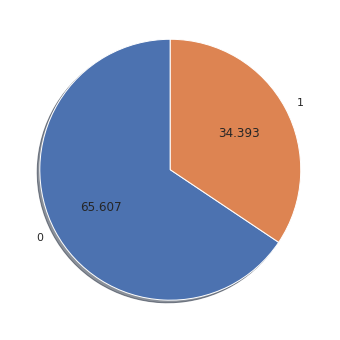

In [537]:
# plotting a piechart of the Survived
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
plt.pie(dataset['Survived'].value_counts(),startangle=90,autopct='%.3f',
        labels=['0','1'],shadow=True)

*From our piechart 65.6% of the passengers did not survive while 34.4% survived*

([<matplotlib.patches.Wedge at 0x7f97c93a0ed0>,
 [Text(-1.0133773259581493, -0.4278625891964743, '3'),
  Text(1.0994445981046763, -0.034951047172393966, '2'),
  Text(0.4598452360808814, 0.9992709136434017, '1')],
 [Text(-0.552751268704445, -0.23337959410716774, '62.717'),
  Text(0.5996970535116416, -0.019064207548578523, '23.555'),
  Text(0.2508246742259353, 0.54505686198731, '13.728')])

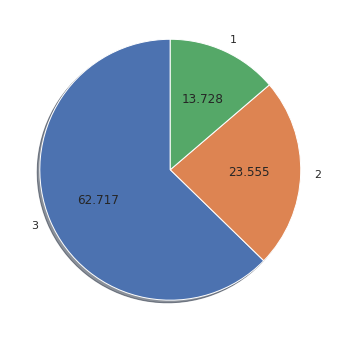

In [536]:
# plotting a piechart of the Pclass
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
plt.pie(dataset['Pclass'].value_counts(),startangle=90,autopct='%.3f',
        labels=['3','2','1'],shadow=True)

*From our piechart 62.7% of the passengers occupied the 3rd class, 23.6% occupied the 2nd class while 13.7% occupied the 1st class.*

([<matplotlib.patches.Wedge at 0x7f97c93cebd0>,
 [Text(-0.7778174593052025, -0.7778174593052023, 'S'),
  Text(0.9773720554796343, 0.5047215719260618, 'C'),
  Text(0.33421438658200575, 1.0479984464690841, 'Q')],
 [Text(-0.4242640687119286, -0.42426406871192845, '75.000'),
  Text(0.5331120302616187, 0.2753026755960337, '15.173'),
  Text(0.18229875631745765, 0.571635516255864, '9.827')])

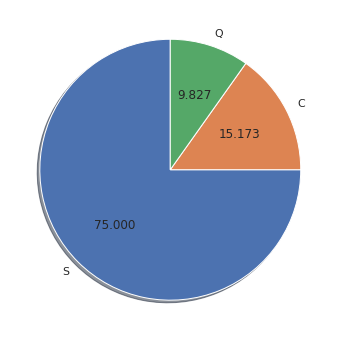

In [535]:
# plotting a piechart of the SibSp
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
plt.pie(dataset['Embarked'].value_counts(),startangle=90,autopct='%.3f',
        labels=['S','C','Q'],shadow=True)

*From our piechart 75% of the passengers embarked from point S, 15%  of the passengers embarked from point C and 9.8% embarked from point Q which was the least*

**Histogram**

Text(0.5, 1.0, 'histogram of Age Distribution')

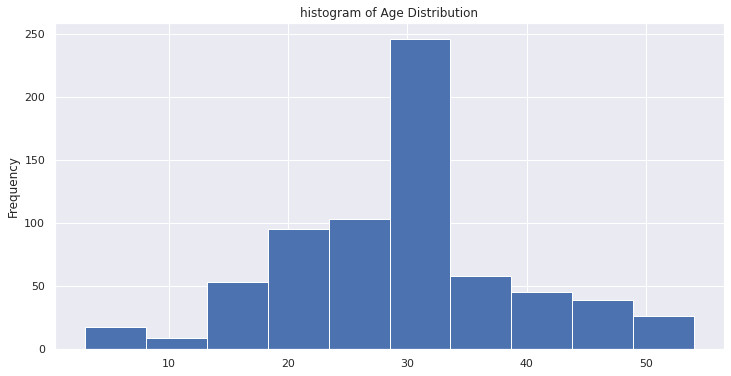

In [531]:
# histogram of age
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
dataset['Age'].plot.hist().set_title('histogram of Age Distribution')

*From our Histogram majority of the passengers were in the age of 30*

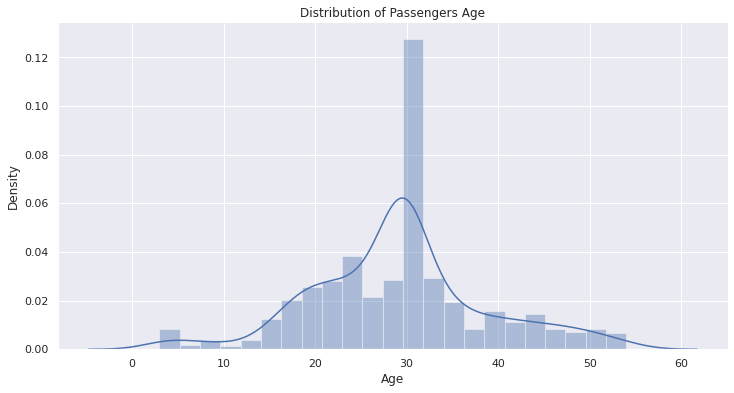

In [532]:
# comparison of age in a distplot
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.distplot(dataset['Age'])
plt.title('Distribution of Passengers Age')
sns.despine()

From our visualization the age appears to be normally distributed

Text(0.5, 1.0, 'Histogram of Fare Distribution')

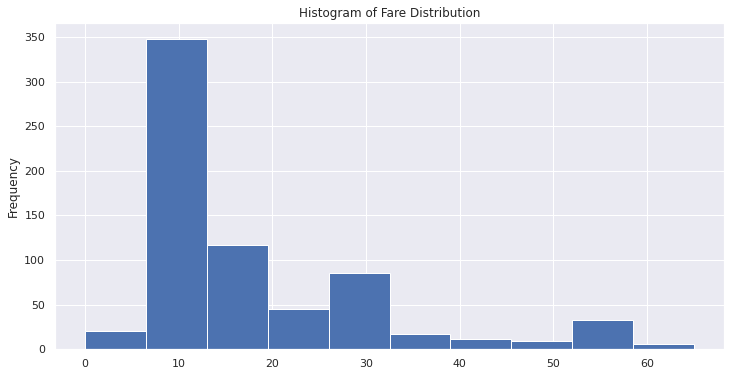

In [533]:
# histogram of fare
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
dataset['Fare'].plot.hist().set_title('Histogram of Fare Distribution')

*From the Histogram the common fare amount paid by the passengers was 10*

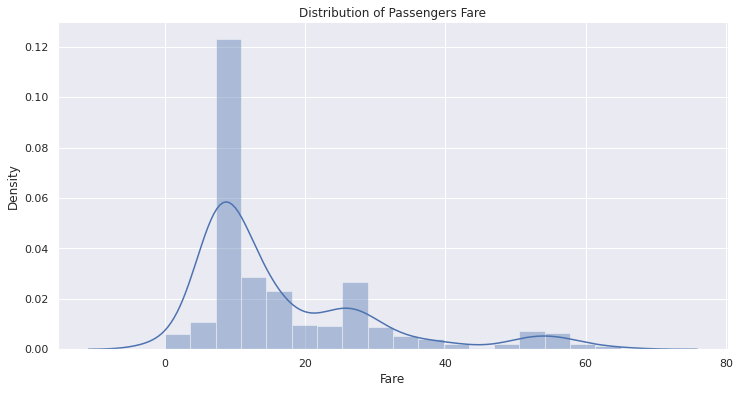

In [534]:
# comparison of Fare in distplot
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.distplot(dataset['Fare'])
plt.title('Distribution of Passengers Fare')
sns.despine()

*From the visualization it appears that the Fare is skewed to the right.* 

*This was a result of the different classes that the passengers paid for.*

### Bivariate Analysis

**Barchart**

Text(0.5, 1.0, 'survival rate per Passenger class')

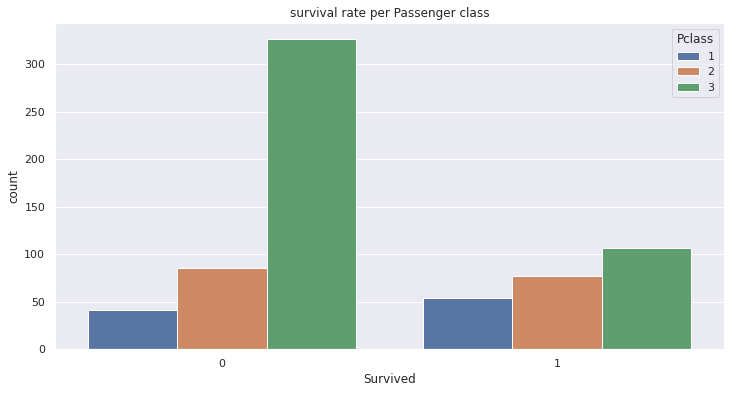

In [43]:
# survival rate per Passenger class
plt.figure(figsize=(12,6))
sns.set_style='darkgrid'
sns.countplot('Survived',data=dataset,hue='Pclass').set_title("survival rate per Passenger class")

*From our plot it is clear that majority of the people who survived were from the passenger class 3 as well as those who did not survive*

Text(0.5, 1.0, 'Gender distribution per Passenger class')

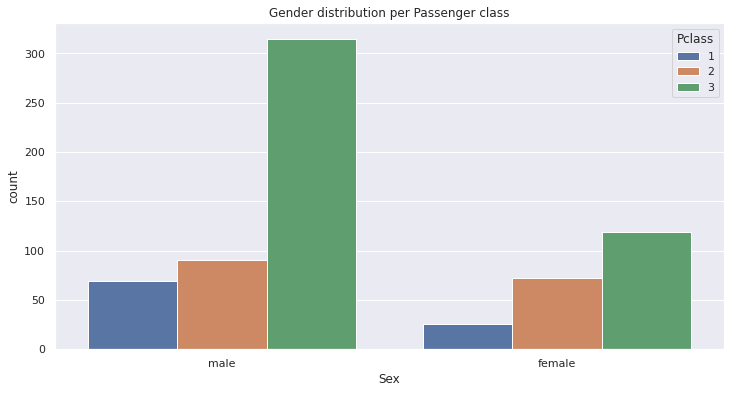

In [45]:
# Gender distribution per Passenger class
plt.figure(figsize=(12,6))
sns.set_style='darkgrid'
sns.countplot('Sex',data=dataset,hue='Pclass').set_title("Gender distribution per Passenger class")

*From our Barchart there were more Male compared to females in all the passenger classes*

Text(0.5, 1.0, 'Gender distribution per Embarked location')

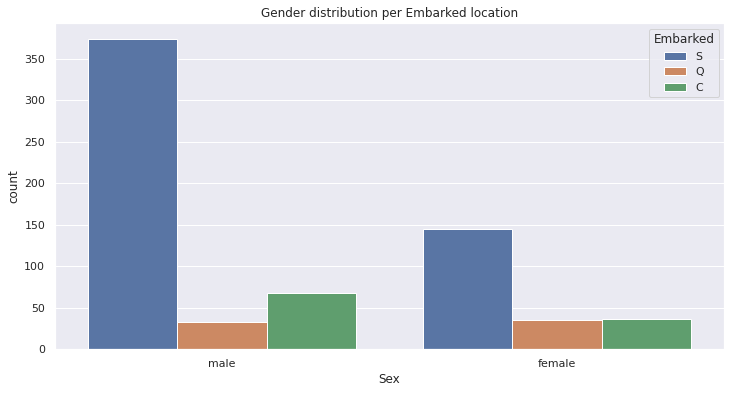

In [47]:
# Gender distribution per Embarked location
plt.figure(figsize=(12,6))
sns.set_style='darkgrid'
sns.countplot('Sex',data=dataset,hue='Embarked').set_title("Gender distribution per Embarked location")

*From our barchart it is clear that more passengers embarked from location S for both the male and female*

Text(0.5, 1.0, 'Survival rate per Embarked location')

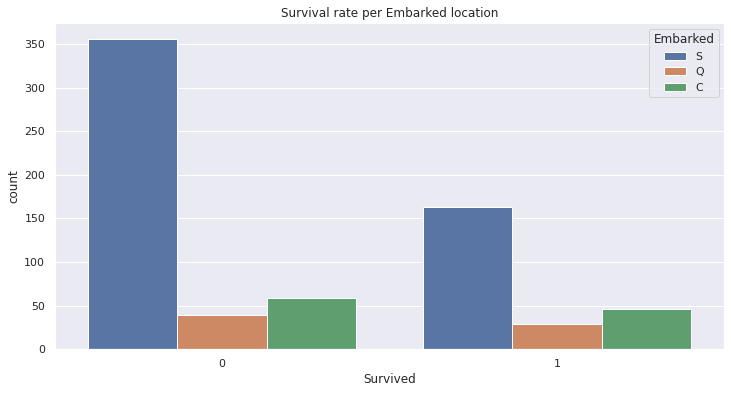

In [51]:
# Survival rate per Embarked location
plt.figure(figsize=(12,6))
sns.set_style='darkgrid'
sns.countplot('Survived',data=dataset,hue='Embarked').set_title("Survival rate per Embarked location")

*From the barchart it is clear that more passengers who embarked from location S survived. It is evident that also it also had the highest number of non- survivors*

Text(0.5, 1.0, 'Survival rate per Gender')

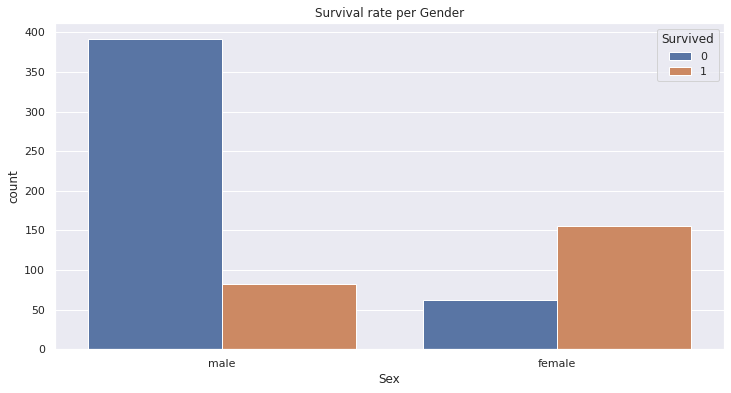

In [50]:
# Survival rate per Gender
plt.figure(figsize=(12,6))
sns.set_style='darkgrid'
sns.countplot('Sex',data=dataset,hue='Survived').set_title("Survival rate per Gender")

*From our barchart it is clear that more females survived to the male*

*Majority of the male passengers did not survive*

**SwarmPlot**

Text(0.5, 1.0, 'Swarmplot of Age compared to Survival rate')

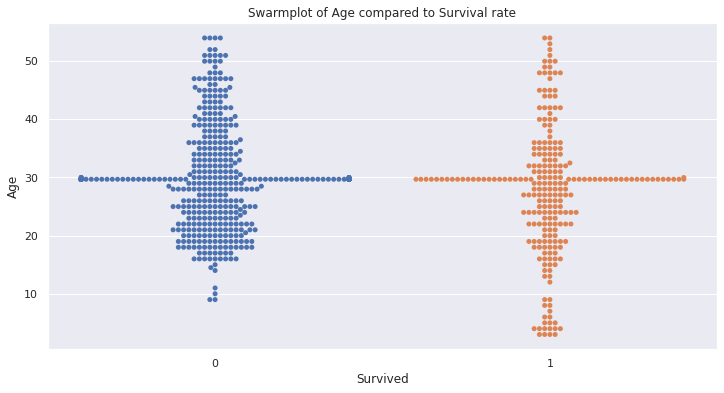

In [530]:
# swarmplot of Age compared to survival rate
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.swarmplot(x=dataset['Survived'],y=dataset['Age']).set_title('Swarmplot of Age compared to Survival rate')

*Majority of the passengers who survived were in the age of 30 years*

Text(0.5, 1.0, 'Swarmplot of Fare compared to Embarked Location')

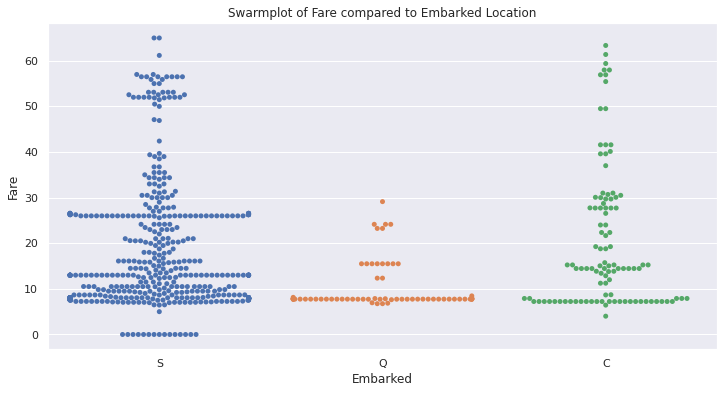

In [529]:
# swarmplot of Fare compared to embarked location 
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.swarmplot(x=dataset['Embarked'],y=dataset['Fare']).set_title("Swarmplot of Fare compared to Embarked Location")

Most of the passengers embarked from location S and the least from point Q

Text(0.5, 1.0, 'Swarmplot of Fare compared to Survival rate')

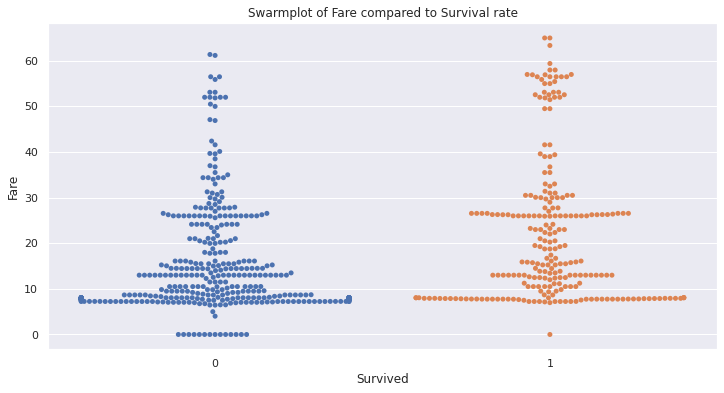

In [490]:
# swarmplot of Fare compared to survival rate
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.swarmplot(x=dataset['Survived'],y=dataset['Fare']).set_title("Swarmplot of Fare compared to Survival rate")

*A large number of people who did not survive paid below 20*

Text(0.5, 1.0, 'Swarmplot of Passenger Class compared to Fare paid')

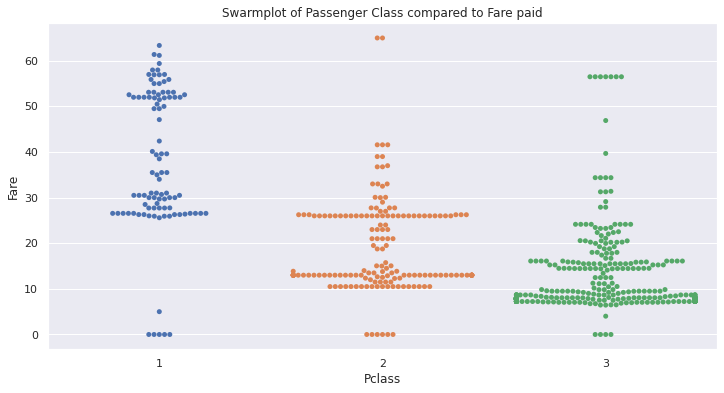

In [489]:
# swarmplot of passenger class compared to the fare 
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.swarmplot(x=dataset['Pclass'],y=dataset['Fare']).set_title("Swarmplot of Passenger Class compared to Fare paid")

*Majority of the passengers were in the class 3*


Text(0.5, 1.0, 'Swarmplot of passenger class compared to their Age')

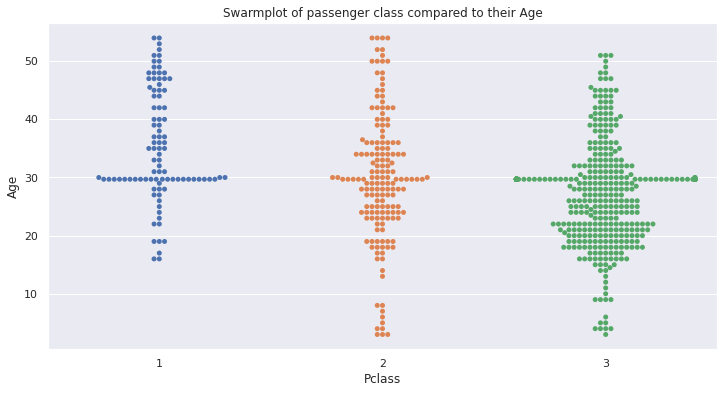

In [488]:
# swarmplot of passenger class compared to the Age 
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.swarmplot(x=dataset['Pclass'],y=dataset['Age']).set_title('Swarmplot of passenger class compared to their Age')

*Majority of the passengers were 30 years and below and the mostly occupied the 3rd class*

**2D KDE plot**

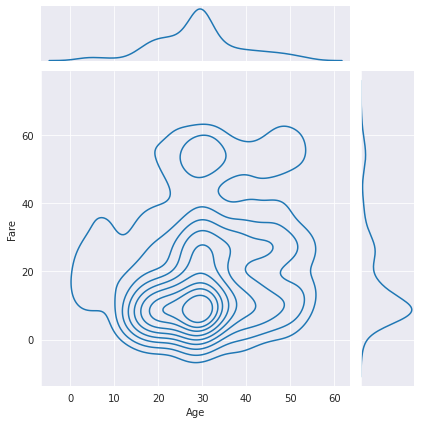

In [476]:
# 2D KDE plot
sns.set_style('darkgrid')
sns.jointplot(x=dataset['Age'], y=dataset['Fare'],kind="kde")

*From our KDE plot the Age on the x-axis is a bit normally distributed while the Fare is skewed this could be due to the varying classes the passengers paid for.*

**Scatterplot**

Text(0.5, 1.0, 'Scatterplot of Passenger class compared to the Fair and Age ')

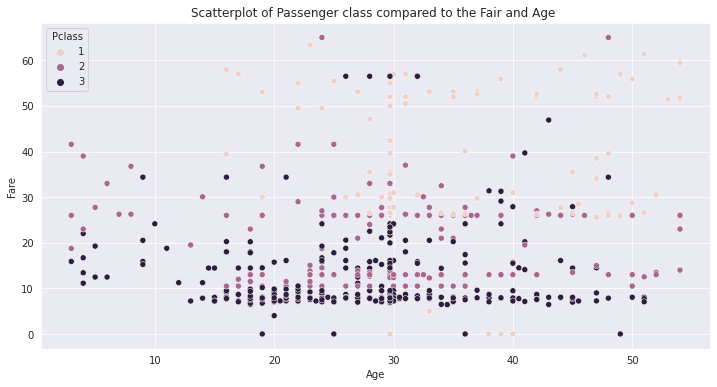

In [477]:
# scatterplot of Pclass compared to the Fare paid and age
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Fare',hue='Pclass', data=dataset).set_title("Scatterplot of Passenger class compared to the Fair and Age ")

*From our Visualization majority of the Passengers between the age 20 to 40 paid below 30 and occupied the 2nd and 3rd Class*

Text(0.5, 1.0, 'Scatterplot of Passenger class compared to the Fair ')

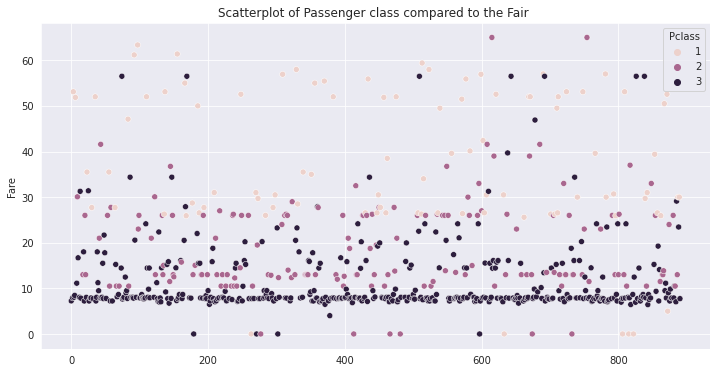

In [478]:
# scatterplot of Pclass compared to the Fare paid
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.scatterplot(x=dataset.index, y=dataset['Fare'],hue=dataset['Pclass']).set_title("Scatterplot of Passenger class compared to the Fair ")

*The passengers who were in Pclass 1 paid more fare compared to the rest*

Text(0.5, 1.0, 'Scatterplot of Survival rate compared to the Age')

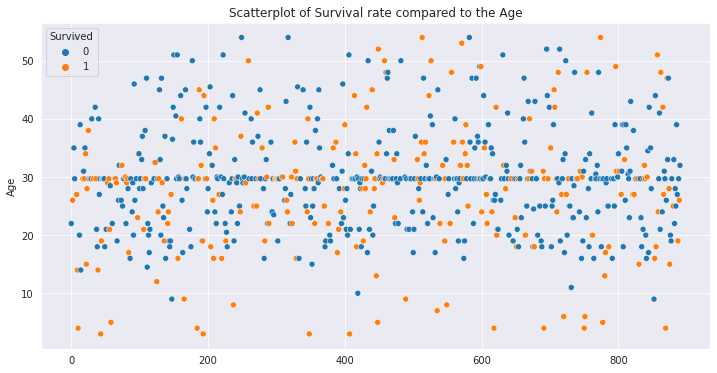

In [479]:
# scatterplot of Survived compared to the passengers Age
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.scatterplot(x=dataset.index, y=dataset['Age'],hue=dataset['Survived']).set_title("Scatterplot of Survival rate compared to the Age")

*From our scatterplot majority of the passengers were in the age group of 30*

Text(0.5, 1.0, 'Scatterplot of Survival rate compared to the Fair')

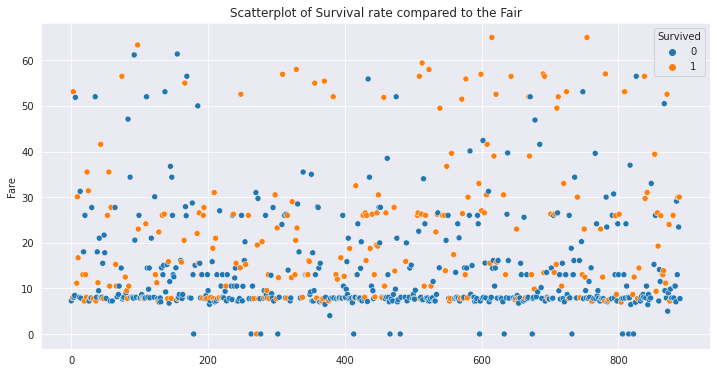

In [480]:
# scatterplot of Survived compared to the Fare paid
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.scatterplot(x=dataset.index, y=dataset['Fare'],hue=dataset['Survived']).set_title("Scatterplot of Survival rate compared to the Fair")

*Majority of the passengers paid around 10 and a good number did not survive as much as there were survivors*

### Multivariate Analysis

**LineChart**

Text(0.5, 1.0, 'Line Chart of Titanic dataset distribution')

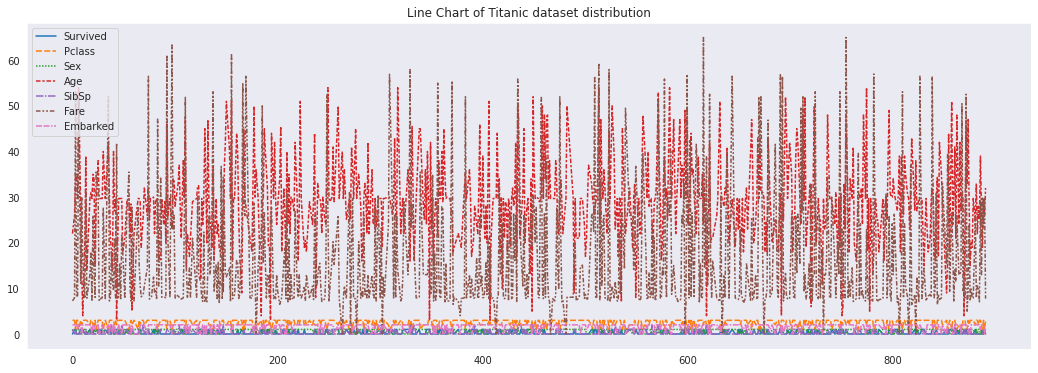

In [468]:
# set the width and height of the figure
plt.figure(figsize=(18,6))
sns.set_style('dark')
# line chart showing the distribution of the Titanic dataset
sns.lineplot(data=dataset).set_title('Line Chart of Titanic dataset distribution')

**Pairplot**

<Figure size 720x720 with 0 Axes>

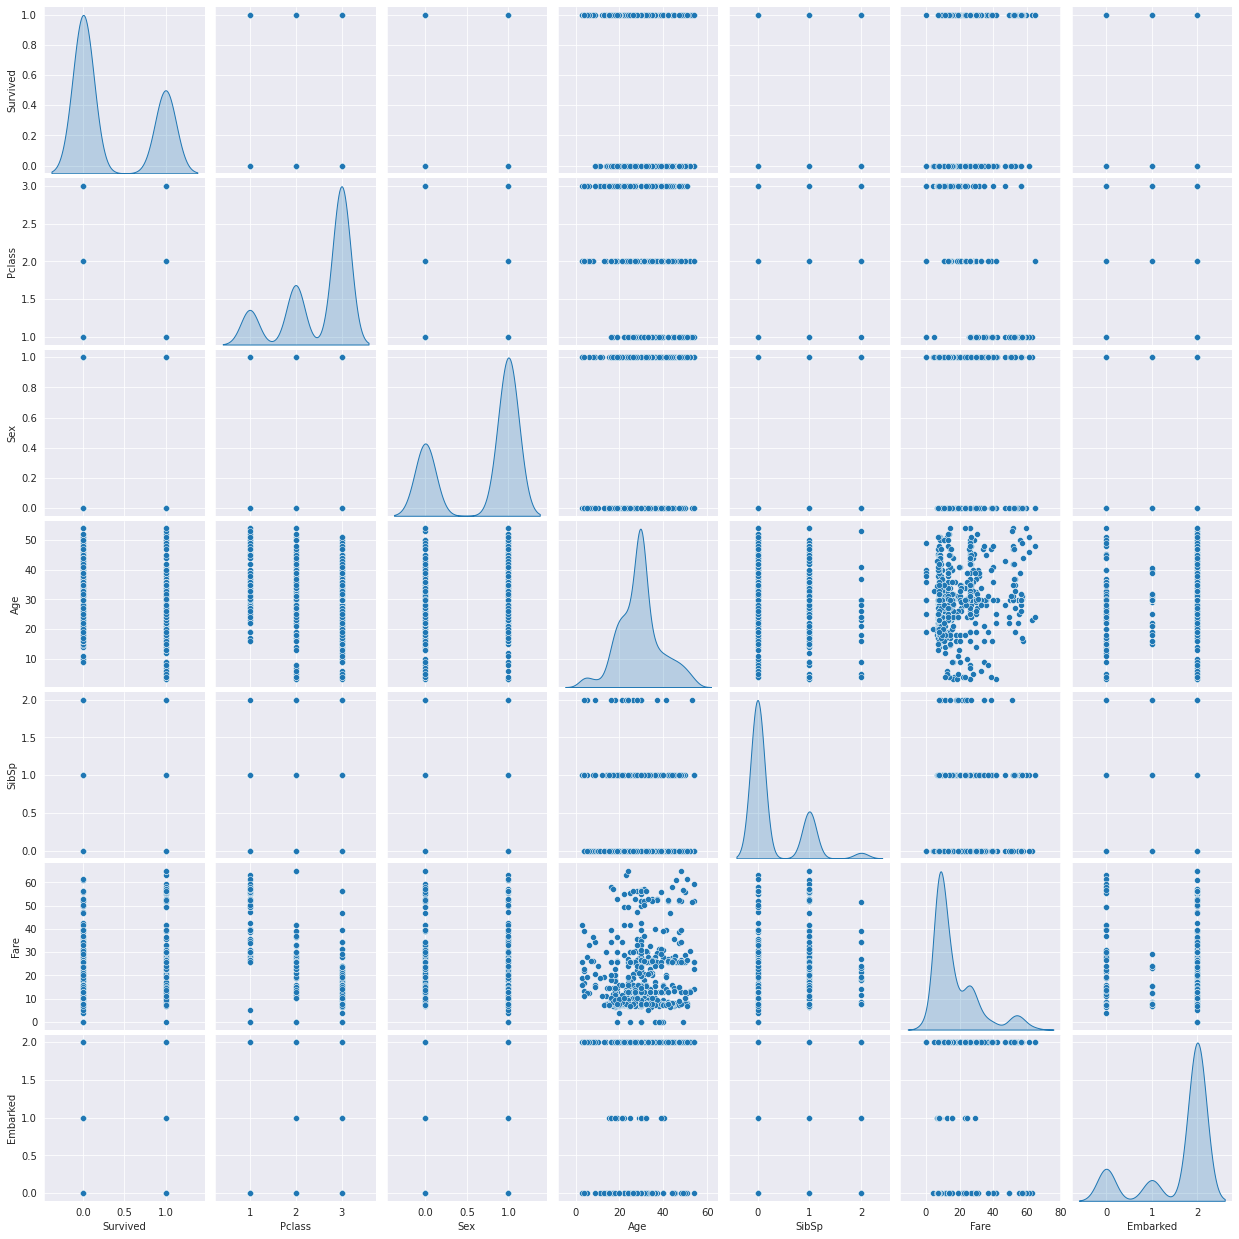

In [471]:
# pairplot for the dataset
plt.figure(figsize=(10,10))
#  style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')
sns.pairplot(dataset,diag_kind='kde')

**Heatmap**

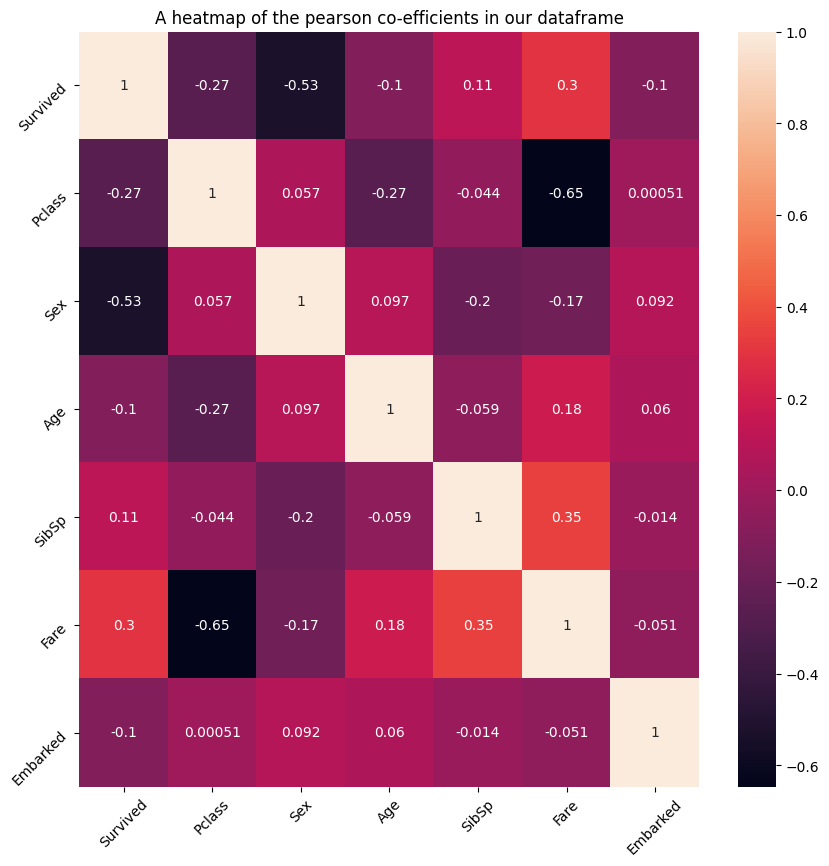

In [454]:
x = dataset.corr()
plt.figure(figsize = (10,10), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "Black")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [428]:
# check for correlations
correlations = dataset.corr()
correlations

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.267135,-0.101961,0.113220,0.297745
Pclass,-0.267135,1.000000,-0.270965,-0.044105,-0.646261
Age,-0.101961,-0.270965,1.000000,-0.058797,0.179042
SibSp,0.113220,-0.044105,-0.058797,1.000000,0.349430
Fare,0.297745,-0.646261,0.179042,0.349430,1.000000


## 7) Implementing the Solution

In [429]:
# label encode the categorical values to numerical
from sklearn.preprocessing import LabelEncoder

# create an instance of labelencoder
labelencoder = LabelEncoder()
dataset['Sex'] = labelencoder.fit_transform(dataset['Sex'])
dataset['Embarked'] = labelencoder.fit_transform(dataset['Embarked'])

In [430]:
# Formulate our data to X and y
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

### KNN - Implementation

In [431]:
# splitting the dataset into Training Set and Test set

# partition dataset to 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [432]:
# Feature Scaling

# Create our object scaler
scaler = StandardScaler()

# fit the object to our training set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [433]:
# Peforming LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [434]:
# Training the KNN model on the Training Set

# create an object of this Classifier  
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# fit the classifier object to our training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [435]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [436]:
# Evaluating the Algorithm Using Confusion Matrix

print(confusion_matrix(y_test, y_pred))
print('*'*100)
print()
print(classification_report(y_test, y_pred))
print('*'*100)
print()

[[77  7]
 [23 32]]
****************************************************************************************************

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        84
           1       0.82      0.58      0.68        55

    accuracy                           0.78       139
   macro avg       0.80      0.75      0.76       139
weighted avg       0.79      0.78      0.78       139

****************************************************************************************************



*From our results our KNN model obtained an accuracy of 78% from a 80-20 split*

*The model managed to get 109 correct predictions and 30 incorrect predictions*

## 8) Challenging the Solution

**Challenging Solution with a 70-30 split**

In [437]:
# partition dataset to 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [438]:
# feature scaling

# Create our object scaler
scaler = StandardScaler()

# fit the object to our training set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [439]:
# Peforming LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

*Euclidian Optimization*

In [440]:
# using metric "minkowski" the value p=2 represents euclidian distance

# create an object of this Classifier  
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# fit the classifier object to our training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [441]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [442]:
# Evaluating the Algorithm Using Confusion Matrix

print(confusion_matrix(y_test, y_pred))
print('*'*100)
print()
print(classification_report(y_test, y_pred))
print('*'*100)
print()

[[112  17]
 [ 32  47]]
****************************************************************************************************

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       129
           1       0.73      0.59      0.66        79

    accuracy                           0.76       208
   macro avg       0.76      0.73      0.74       208
weighted avg       0.76      0.76      0.76       208

****************************************************************************************************



*From our results our KNN model obtained an accuracy of 76% from a 70-30 split*

*The model managed to get 159 correct predictions and 49 incorrect predictions*

**Challenging Solution with a 60-40 split**

In [443]:
# partition dataset to 60-40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [444]:
# feature scaling

# Create our object scaler
scaler = StandardScaler()

# fit the object to our training set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [445]:
# Peforming LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

*Manhattan Distance Optimization*

In [446]:
# create an object of this Classifier  
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)

# fit the classifier object to our training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [447]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [448]:
# Evaluating the Algorithm Using Confusion Matrix

print(confusion_matrix(y_test, y_pred))
print('*'*100)
print()
print(classification_report(y_test, y_pred))
print('*'*100)
print()

[[152  24]
 [ 45  56]]
****************************************************************************************************

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       176
           1       0.70      0.55      0.62       101

    accuracy                           0.75       277
   macro avg       0.74      0.71      0.72       277
weighted avg       0.75      0.75      0.74       277

****************************************************************************************************



*From our results our KNN model obtained an accuracy of 75% from a 60-40 split*

*The model managed to get 208 correct predictions and 69 incorrect predictions*

## **CONCLUSION**

*From our implementation of the KNN Model Classifier, with a 80-20 split the model had a 78% accuracy, 70-30 split had a 76% accuracy and the 60-40 split had a 75% accuracy.*

*This clearly shows that the models accuracy in percentage went on decreasing with the splits*

*On the other hand the number of correct predictions went on increasing at 109 correct predictions for the 80-20, 159 correct predictions for the 70-30 split and finally 208 correct predictions for the 60-40 split*


## **RECOMMENDATION**

*Based on our findings it would be efficient to have a 60-40 split as it gives a higher number of correct predictions for our KNN Model Classifier at 208. But based on accuracy a 80-20 split would be recommended since the accuracy was much higher at 78%*